# I. Thu thập dữ liệu


## 1. Giới thiệu về đề tài

Dữ liệu được dùng có tên **Customer Personality Analysis** 

Link dataset: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data

Việc phân tích hành vi, tính cách của khách hàng là một cách then chốt trong việc hiểu được khách hàng, từ đó đưa ra được các hành động hợp lý, nâng cao lợi nhuận.

Bên cạnh đó, việc này cũng giúp doanh nghiệp có những điều chỉnh thích hợp trong chiến lược kinh doanh như: nâng cao chất lượng sản phẩm được yêu thích, hạn chế sản xuất các sản phẩm ít được đón nhận...



## 2. Lý do lựa chọn

Một số lý do mà nhóm lựa chọn đề tài này:

- Mang tính ứng dụng cao trong công việc

- Sử dụng trực quan hoá để thể hiện dữ liệu, từ đó rút ra được các thông tin hữu ích về hành vi của khách hàng.

- Áp dụng một số kĩ thuật đã học để phân tích khách hàng như: trực quan hoá, gom cụm, phân loại...

## 3. 


## 4. Cách dữ liệu được tạo ra

Dữ liệu do công ty thực phẩm iFood thu thập nhằm mục đích tối đa hoá lợi nhuận tạo ra từ chiến dịch marketing sắp tới. 

Một chiến dịch thí điểm với sự tham gia của 2,240 khách hàng được thực hiện. Trong đó những khách hàng sẽ được gán nhãn liệu rằng họ có đồng ý với offer của công ty hay không.


## 5. Dữ liệu có được sử dụng cho mục đích giáo dục hay không?

Giấy phép của datasets là `CC0: Public Domain`, do đó chúng ta có thể sử dụng datasets này để phục vụ trong bài Lab

# II.Tiền xử lý dữ liệu

## 1. Import các thư viện cần thiết

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## 2. Đọc dataset từ file csv

In [159]:
raw_df = pd.read_csv("data/marketing_campaign.csv", sep='\t')

In [160]:
raw_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## 3. Số dòng và cột

In [161]:
n_rows, n_cols = raw_df.shape
print(f"Dataset có {n_rows} dòng và {n_cols} cột")

Dataset có 2240 dòng và 29 cột


## 4. Ý nghĩa của các dòng

People
- `ID`: Id để định danh khách hàng  
- `Year_Birth`: Năm sinh của khách hàng 
- `Education`: trình độ học vấn  
- `Marital_Status`: Tình trạng hôn nhân  
- `Income`: Thu nhập hàng năm của khách hàng  
- `Kidhome`: Sô trẻ con trong gia đình  
- `Teenhome`: Số trẻ vị thành niên trong gia đình
- `Dt_Customer`: Ngày khách hàng mua hàng đầu tiên
- `Recency`: Số ngày kể từ lần cuối khách hàng mua hàng
- `Complain`: 1 nếu khách hàng có complain trong 2 năm gần nhất, 0 cho các trường hợp khác  


Products
- `MntWines`: Số tiền đã chi tiêu cho rượu trong 2 năm qua
- `MntFruits`: Số tiền đã chi tiêu cho hoa quả trong 2 năm qua 
- `MntMeatProducts`: Số tiền đã chi tiêu cho thịt trong 2 năm qua 
- `MntFishProducts`: Số tiền đã chi tiêu cho cá trong 2 năm qua
- `MntSweetProducts`: Số tiền đã chi tiêu cho đồ ngọt trong 2 năm qua
- `MntGoldProds`: Số tiền đã chi tiêu cho vàng trong 2 năm qua   

Promotion  
- `NumDealsPurchases`: Số lượng mua hàng được giảm giá
- `AcceptedCmp1`: 1 nếu khách hàng chấp nhận ưu đãi trong chiến dịch 1, 0 nếu ngược lại
- `AcceptedCmp2`: 1 nếu khách hàng chấp nhận ưu đãi trong chiến dịch 2, 0 nếu ngược lại
- `AcceptedCmp3`: 1 nếu khách hàng chấp nhận ưu đãi trong chiến dịch 3, 0 nếu ngược lại
- `AcceptedCmp4`: 1 nếu khách hàng chấp nhận ưu đãi trong chiến dịch 4, 0 nếu ngược lại
- `AcceptedCmp5`: 1 nếu khách hàng chấp nhận ưu đãi trong chiến dịch 5, 0 nếu ngược lại
- `Response`: 1 nếu khách hàng chấp nhận ưu đãi trong chiến dịch cuối cùng, 0 nếu ngược lại

Place  
- `NumWebPurchases`: Số lượng mua hàng thông qua trang web của công ty
- `NumCatalogPurchases`: Số lượng mua hàng sử dụng catalogue
- `NumStorePurchases`: Số lượng mua hàng trực tiếp tại cửa hàng
- `NumWebVisitsMonth`: Số lượng lượt truy cập vào trang web của công ty trong tháng vừa qua


## 5. Kiểm tra sự trùng lắp của các dòng

In [162]:
n_dups = raw_df.duplicated().sum()

if n_dups:
    print(f"Dataset có {n_dups} dòng trùng lắp")
else:
    print("Dataset không bị trùng lắp")

Dataset không bị trùng lắp


## 6. Liệu kiểu dữ liệu của các cột đã hợp lý hay chưa?

In [163]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

- Trong ` Income ` có các giá trị bị thiếu  
- Cột `Dt_Customer` nên là kiểu dữ liệu datetime  
- Các cột `Complain` và `Accepted` nên là kiểu boolean

### Chuyển cột `Dt_Customer` sang kiểu datetime

In [164]:
raw_df["Dt_Customer"] = pd.to_datetime(raw_df["Dt_Customer"], format='%d-%m-%Y')
raw_df["Dt_Customer"] 

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

### Chuyển các cột `Complain` và `Accepted` sang kiểu boolean

In [165]:
columns = ["Complain", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"]
raw_df[columns] = raw_df[columns].apply(lambda x: x.astype(bool))
raw_df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                     bool
AcceptedCmp4                     bool
AcceptedCmp5                     bool
AcceptedCmp1                     bool
AcceptedCmp2                     bool
Complain                         bool
Z_CostContac

### Xử lí các giá trị bị thiếu trong cột `Income` bằng cách điền các giá trị trung bình

In [166]:
median_income = raw_df["Income"].median()
raw_df["Income"].fillna(median_income, inplace=True)

print(f'Số lượng giá trị nan: {raw_df["Income"].isna().sum()}')

Số lượng giá trị nan: 0


## 7. Kiểm tra lại missing values

In [167]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

## 8. Xem xét  `summary statistics` của các cột Numerical

In [168]:
raw_df.describe(include='number')


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0
mean,5592.159821,1968.805804,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,3.0,11.0
std,3246.662198,11.984069,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.0,0.0
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,3.0,11.0
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,3.0,11.0
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,3.0,11.0
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,3.0,11.0


**Nhận xét**

- Nhìn chung, giá trị các cột không có gì bất thường

- Giá trị max của cột `Income` khá lớn

### Visualize histogram của các cột Numerical

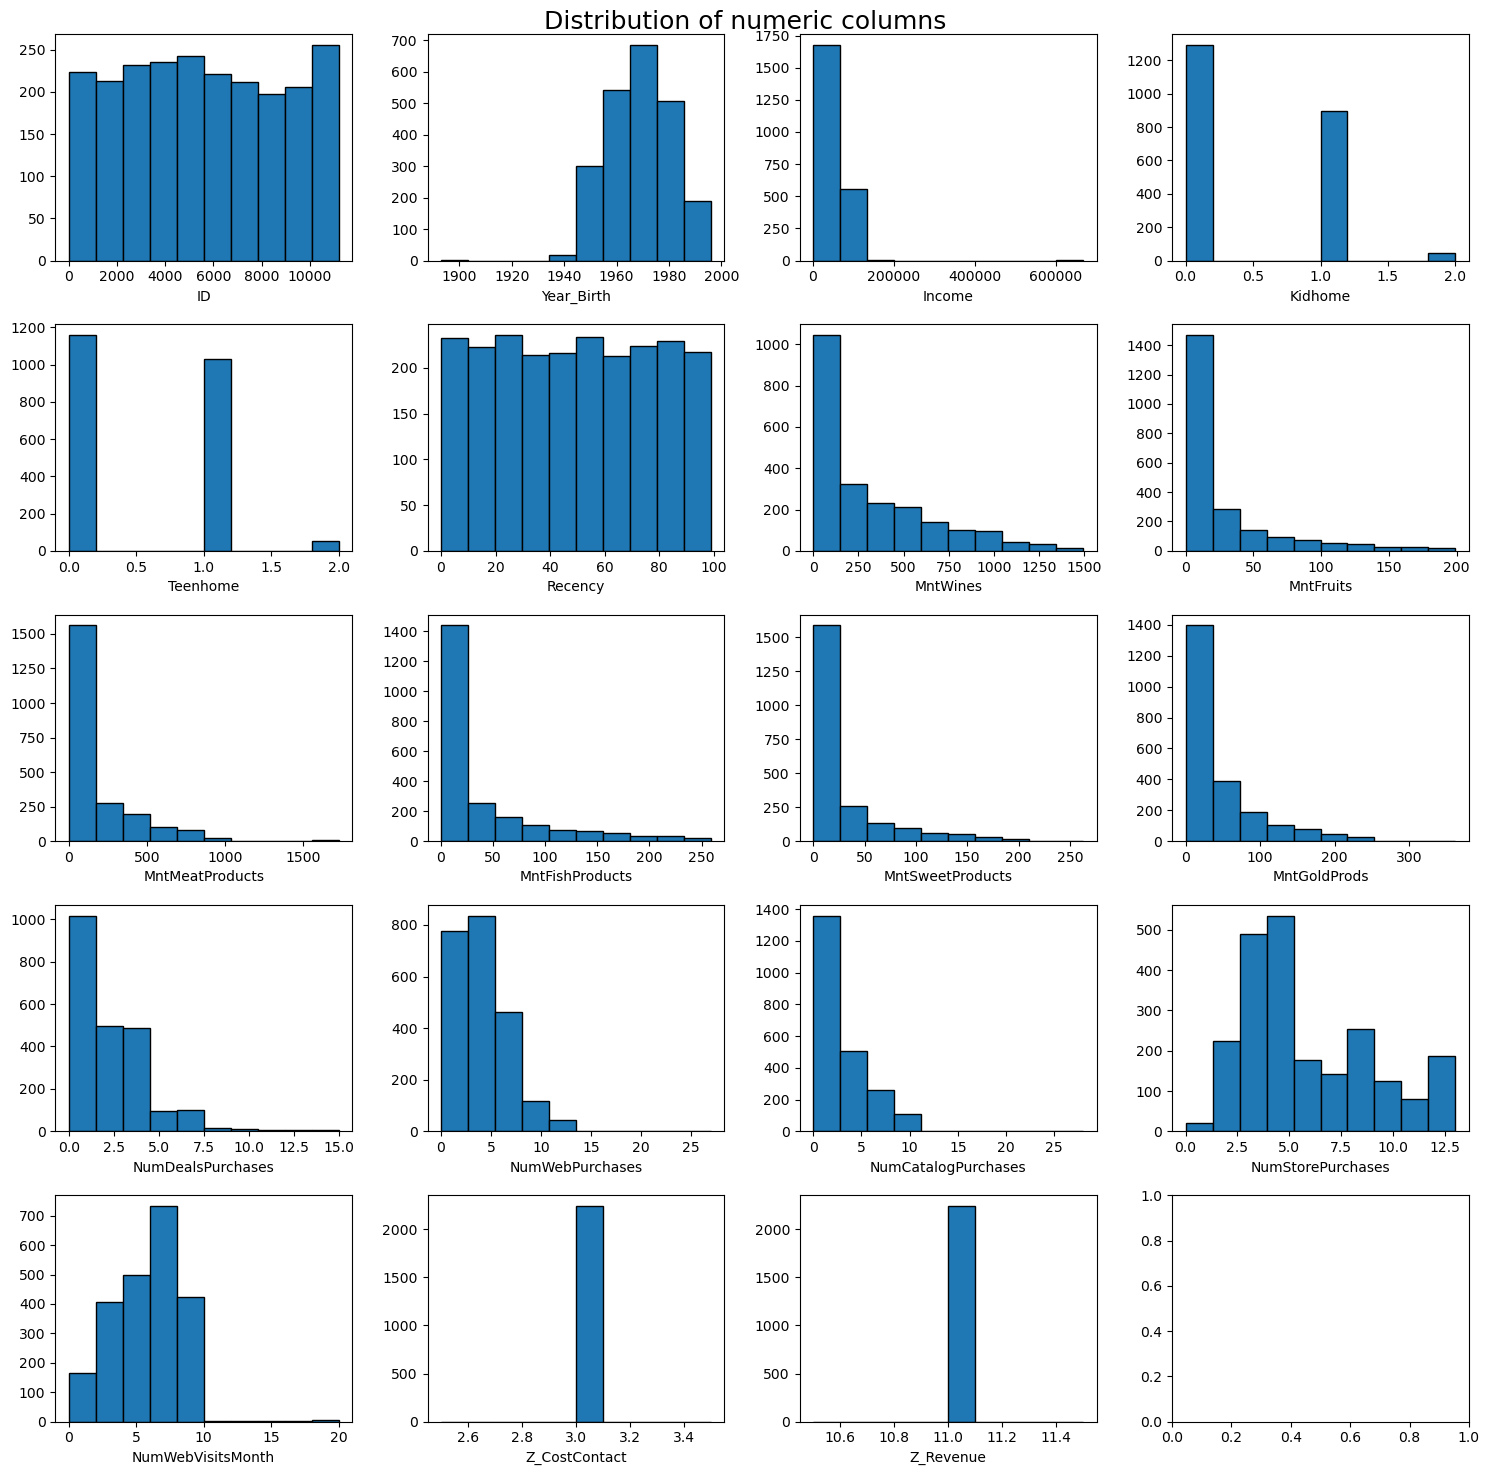

In [169]:
numeric_cols = raw_df.select_dtypes(include='number').columns

num_rows = 5
num_cols = 4

fig, ax = plt.subplots(num_rows, num_cols, figsize=(15, 15))

for i, col in enumerate(numeric_cols):
    row_index = i // num_cols
    col_index = i % num_cols
    ax[row_index, col_index].hist(raw_df[col], edgecolor="black", bins=10)
    ax[row_index, col_index].set_xlabel(col)

fig.suptitle("Distribution of numeric columns", size=18)

plt.tight_layout()
plt.show()

### Visualize boxplot cho các cột Numerical

Vì `ID` chủ yếu mang tính phân biệt các giá trị quan trắc với nhau cho nên ta sẽ bỏ qua nó trong việc trực quan bằng boxplot

In [170]:
numeric_cols = numeric_cols.drop("ID", errors='ignore')

Ở bước này, để dễ dàng quan sát các boxplot của các cột numerical nên ta sẽ chuẩn hoá (Z-score).

In [171]:
num_df = raw_df[numeric_cols]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(raw_df[numeric_cols])
scaled_num_df = pd.DataFrame(scaled_data, columns=numeric_cols)


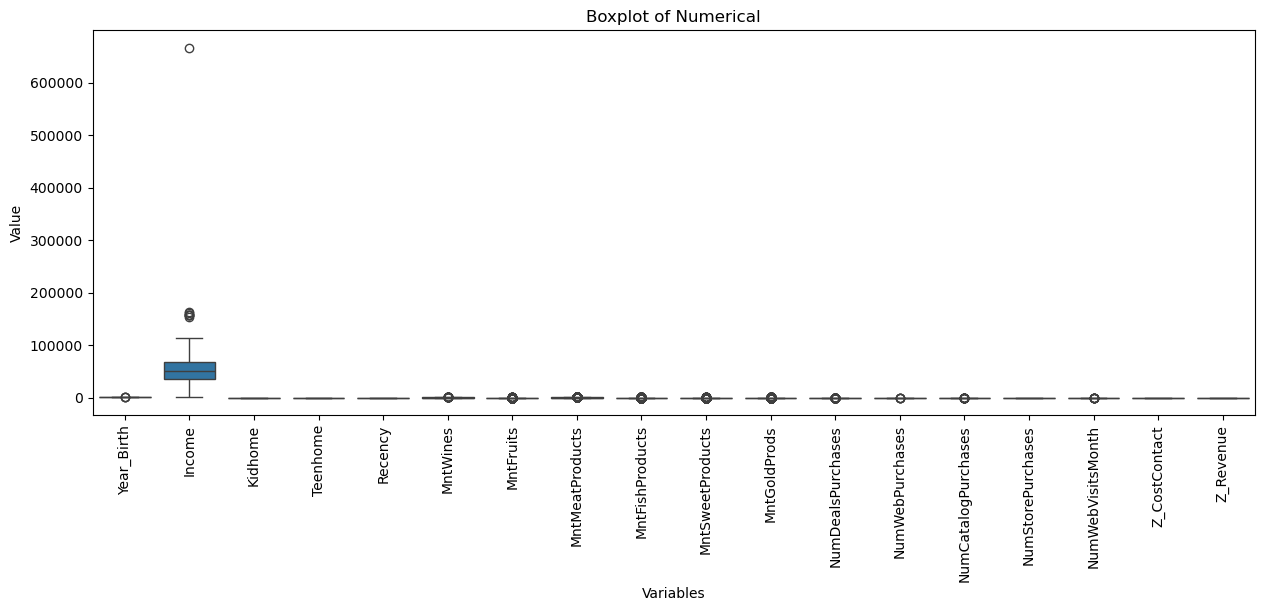

In [172]:
melted_df = pd.melt(num_df, var_name='Variables', value_name='Value')
plt.figure(figsize=(15, 5))
plt.title("Boxplot of Numerical")
plt.xticks(rotation=90)
sns.boxplot(x='Variables', y='Value', data=melted_df);

**Nhận xét**

- Nhìn chung dữ liệu tương đối có ít outliers

- Ở cột `Income` là có nhiều outliers nhất. Có outliers nằm tương đối xa so với phần lớn giá trị của chúng ta.

Bây giờ ta sẽ sử dụng histogram để xem xét sự phân bố của Income

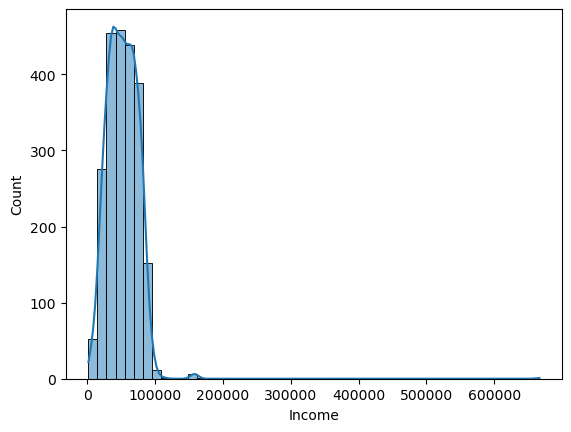

In [173]:
sns.histplot(raw_df["Income"], bins= 50, kde=True);

Outlier có giá trị `Income` trên mức 60000 (max của `Income`). Đây là có số quá lớn so với phần còn lại. Tuy nhiên, với quy mô của một công ty về thực phẩm đại trà nên chúng ta sẽ bỏ đi điểm dữ liệu này để phần lớn dữ liệu bớt ảnh hưởng bởi nó

In [174]:
max_income = raw_df['Income'].max()
max_income

666666.0

In [175]:
raw_df = raw_df[raw_df['Income'] != max_income]
raw_df.shape

(2239, 29)

## 9. Xem xét các cột Categorical

In [176]:
categolical_cols = raw_df.select_dtypes(include="object").columns.tolist()
raw_df[categolical_cols].head()

,Education,Marital_Status
0,Graduation,Single
1,Graduation,Single
2,Graduation,Together
3,Graduation,Together
4,PhD,Married


In [177]:
df_plot = raw_df.groupby(['Marital_Status', 'Education']).size().reset_index().pivot(columns='Marital_Status', index='Education', values=0)
df_plot

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,NaN,NaN,23.0,81.0,37.0,57.0,5.0,NaN
Basic,NaN,NaN,1.0,20.0,18.0,14.0,1.0,NaN
Graduation,1.0,1.0,119.0,433.0,252.0,285.0,35.0,NaN
Master,1.0,1.0,37.0,138.0,75.0,106.0,12.0,NaN
PhD,NaN,1.0,52.0,192.0,98.0,117.0,24.0,2.0


- `Education`: Kiêủ dữ liệu ordinal, ta có thể chuyển thành
   - Basic: 0

   - Graduation: 1

   - 2n Cycle: 2

   - Master: 3
   
   - PhD: 4  
   
 - `Marital_Status`: Kiêủ dữ liệu nominal, ta có thể dùng one-hot encoding
 

###  Áp dụng one-hot encoding cho cột Marital_Status

In [178]:
raw_df = pd.get_dummies(raw_df, columns=["Marital_Status"])
marital_status_cols = [col for col in raw_df.columns if 'Marital_Status' in col]
# Hiển thị DataFrame sau khi đã mã hóa
raw_df[marital_status_cols].head()

,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0


### Kiểm tra lại shape của data và lưu lại cho các bước xử lý tiếp theo

In [183]:
raw_df.shape

(2239, 36)

In [184]:
raw_df.to_csv("data/marketing_campaign_cleaned.csv", index=False)